In [0]:
# rp200112_AUC_analysis.ipynb
# 200112(일) 22:15~
# 천성욱

# 목표 : 제출했던 submission csv파일과 human labeling으로 추산한 auc를 통해, 제출전에 모델의 성능을 가늠해본다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [68]:
import pandas as pd

df_sub = pd.read_csv('/content/drive/My Drive/금융문자/데이터/s_200112_ep0_10_30Ksa_wkSEPoktBERT_X512tX512_bs12_vacc.csv')
df_human = pd.read_excel('/content/drive/My Drive/금융문자/human_m.xlsx')
display(df_sub.head(1))
display(df_human.head(1))

,id,smishing
0,340000,0.052917


,id,machine,human
0,340000,0.000109,0


In [13]:
from sklearn import metrics

def f_get_auc(var_l_preds):
    fpr, tpr, threshold = metrics.roc_curve(df_human['human'].values, var_l_preds)
    auc = metrics.auc(fpr, tpr)
    return auc
f_get_auc(df_sub['smishing'].values)

0.7195670424562246

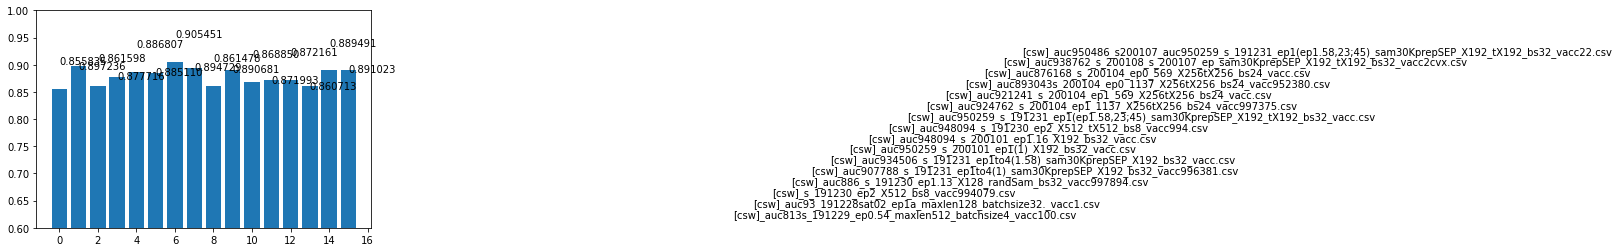

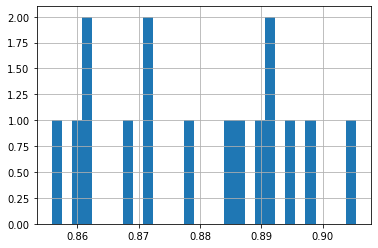

In [75]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

l_df_auc = list()
for file in glob('/content/drive/My Drive/금융문자/submissions/submitted_csv/*.csv'):
    filename = os.path.basename(file)
    # print(filename[:2])
    if filename[:2] == '[c':
        tmp_df = pd.read_csv(file)
        tmp_auc = f_get_auc(tmp_df['smishing'])
        l_df_auc.append([file, tmp_auc])

df_auc = pd.DataFrame(l_df_auc, columns=['filename', 'auc'])
df_auc.head(1)

plt.bar(np.arange(len(l_df_auc)), [item[1] for item in l_df_auc])
plt.yticks(np.arange(0, 1.1, 0.05))
tmp_const = 0.025
for x, item in zip(np.arange(len(l_df_auc)), l_df_auc):
    filename = os.path.basename(item[0])
    y = item[1]
    plt.text(x, y+0.02+tmp_const, '{:0.6f}'.format(y))#filename)
    plt.text(x+35, 0.62+x*0.02, filename)
    tmp_const *= -1
plt.ylim(0.6, 1)
plt.show()

df_auc['auc'].hist(bins=30)

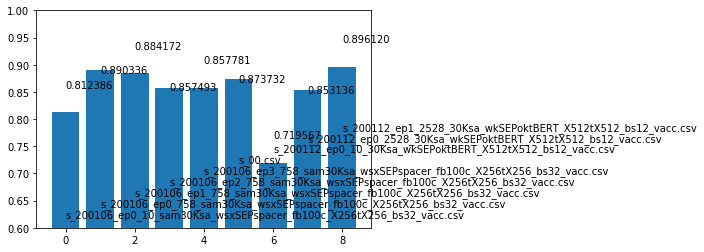

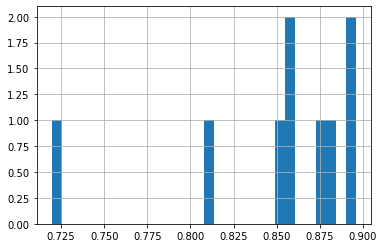

In [65]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import os

l_df_auc = list()
for file in glob('/content/drive/My Drive/금융문자/데이터/*.csv'):
    filename = os.path.basename(file)
    # print(filename[:2])
    if filename[:2] == 's_':
        tmp_df = pd.read_csv(file)
        tmp_auc = f_get_auc(tmp_df['smishing'])
        l_df_auc.append([file, tmp_auc])

df_auc = pd.DataFrame(l_df_auc, columns=['filename', 'auc'])
df_auc.head(1)

plt.bar(np.arange(len(l_df_auc)), [item[1] for item in l_df_auc])
plt.yticks(np.arange(0, 1.1, 0.05))
tmp_const = 0.025
for x, item in zip(np.arange(len(l_df_auc)), l_df_auc):
    filename = os.path.basename(item[0])
    y = item[1]
    plt.text(x, y+0.02+tmp_const, '{:0.6f}'.format(y))#filename)
    plt.text(x, 0.62+x*0.02, filename)
    tmp_const *= -1
plt.ylim(0.6, 1)
plt.show()

df_auc['auc'].hist(bins=30)